## 数据可视化：股票数据分析

先使用conda安装：

1）python3环境

2）安装互联数据获取包pandas-datareader

In [1]:
#导入包
#数据分析包
import pandas as pd
from pandas_datareader import data
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '12'}
plt.rc('font', **font)               # 步骤一（设置字体的更多属性）
plt.rc('axes', unicode_minus=False)  # 步骤二（解决坐标轴负数的负号显示问题）


In [2]:
# 存在的问题：由于是从国外获取股票数据，会由于网络不稳定，获取数据失败，多运行几次这个cell就好了
'''
获取国内股票数据的方式是：“股票代码”+“对应股市”（港股为.hk，A股为.ss）
例如腾讯是港股是：0700.hk
'''
#字典：6家公司的股票
gafataDict={'谷歌':'GOOG','亚马逊':'AMZN','Facebook':'FB',
            '苹果':'AAPL','阿里巴巴':'BABA','腾讯':'0700.hk'}
# 获取哪段时间范围的股票数据
start_date = '2018-01-01'
end_date = '2019-05-01'

## 阿里巴巴

In [3]:
'''
get_data_yahoo表示从雅虎数据源获取股票数据
雅虎股票数据源文档：http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#yahoo-finance
'''
# # 获取哪段时间范围的股票数据
# start_date = '2018-01-01'
# end_date = '2019-05-01'
#获取阿里巴巴股票数据
ALbbDf = data.get_data_yahoo(gafataDict['阿里巴巴'],start_date, end_date)
#查看前5行数据
ALbbDf.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,188.130005,183.955002,185.240005,187.880005,10328900,187.880005
2019-04-26,188.740005,185.509995,187.880005,187.089996,9421100,187.089996
2019-04-29,188.000000,185.759995,187.419998,186.940002,8660600,186.940002
2019-04-30,188.250000,183.820007,186.300003,185.570007,15076500,185.570007
2019-05-01,193.195007,185.880005,186.750000,189.309998,17397500,189.309998


In [4]:
'''
每日股票价位信息
Open:开盘价
High:最高加
Low：最低价
Close：收盘价
Volume：成交量
下面我们主要关注每日的收盘价
'''

'\n每日股票价位信息\nOpen:开盘价\nHigh:最高加\nLow：最低价\nClose：收盘价\nVolume：成交量\n下面我们主要关注每日的收盘价\n'

In [5]:
#股票数据的行索引是时间序列类型，记录每天的股票信息
ALbbDf.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=334, freq=None)

In [6]:
#查看数据集情况
ALbbDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2018-01-02 to 2019-05-01
Data columns (total 6 columns):
High         334 non-null float64
Low          334 non-null float64
Open         334 non-null float64
Close        334 non-null float64
Volume       334 non-null int64
Adj Close    334 non-null float64
dtypes: float64(5), int64(1)
memory usage: 18.3 KB


In [7]:
#查看每一列数据类型
ALbbDf.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [8]:
#查看数据集描述统计信息
ALbbDf.describe()

,High,Low,Open,Close,Volume,Adj Close
count,334.000000,334.000000,334.000000,334.000000,3.340000e+02,334.000000
mean,177.391278,172.718724,175.191135,175.107455,1.862441e+07,175.107455
std,18.478215,18.741932,18.579197,18.598910,8.710564e+06,18.598910
min,134.570007,129.770004,130.000000,130.600006,7.146800e+06,130.600006
25%,163.197254,158.384251,160.367496,161.010002,1.301642e+07,161.010002
50%,181.724998,177.000000,179.459999,179.375000,1.681555e+07,179.375000
75%,190.419994,185.704994,188.090004,187.525002,2.128875e+07,187.525002
max,211.699997,207.509995,209.949997,210.860001,7.884340e+07,210.860001


In [9]:
# 增加一列“DayHL”,表示日最高价和日最低价之间的差值
ALbbDf["DayHL"]= ALbbDf.eval(" High-Low")
# ALbbDf = ALbbDf.eval("DayHL = High-Low")
ALbbDf.tail()

,High,Low,Open,Close,Volume,Adj Close,DayHL
Date,,,,,,,
2019-04-25,188.130005,183.955002,185.240005,187.880005,10328900,187.880005,4.175003
2019-04-26,188.740005,185.509995,187.880005,187.089996,9421100,187.089996,3.230011
2019-04-29,188.000000,185.759995,187.419998,186.940002,8660600,186.940002,2.240005
2019-04-30,188.250000,183.820007,186.300003,185.570007,15076500,185.570007,4.429993
2019-05-01,193.195007,185.880005,186.750000,189.309998,17397500,189.309998,7.315002


## 谷歌

In [10]:
#获取谷歌股票数据
GoogleDf=data.get_data_yahoo(gafataDict['谷歌'],start_date, end_date)
GoogleDf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,1267.407959,1252.030029,1264.770020,1263.449951,1107300,1263.449951
2019-04-26,1273.069946,1260.319946,1269.000000,1272.180054,1241400,1272.180054
2019-04-29,1289.270020,1266.295044,1274.000000,1287.579956,2499400,1287.579956
2019-04-30,1192.810059,1175.000000,1185.000000,1188.479980,6207000,1188.479980
2019-05-01,1188.050049,1167.180054,1188.050049,1168.079956,2639200,1168.079956


## 亚马逊

In [11]:
#获取亚马逊股票数据
AmazDf=data.get_data_yahoo(gafataDict['亚马逊'],start_date, end_date)
AmazDf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,1922.449951,1900.310059,1917.000000,1902.250000,6099100,1902.250000
2019-04-26,1951.000000,1898.000000,1929.000000,1950.630005,8432600,1950.630005
2019-04-29,1956.339966,1934.089966,1949.000000,1938.430054,4021300,1938.430054
2019-04-30,1935.709961,1906.949951,1930.099976,1926.520020,3506000,1926.520020
2019-05-01,1943.640015,1910.550049,1933.089966,1911.520020,3117000,1911.520020


In [12]:
#获取亚马逊股票数据
amazDf=data.get_data_yahoo(gafataDict['亚马逊'],start_date, end_date)

## Facebook

In [13]:
#获取Facebook股票数据
FBDf=data.get_data_yahoo(gafataDict['Facebook'],start_date, end_date)
FBDf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,198.479996,192.119995,196.979996,193.259995,54148800,193.259995
2019-04-26,192.899994,189.089996,192.500000,191.490005,22075000,191.490005
2019-04-29,195.410004,190.649994,190.949997,194.779999,19641300,194.779999
2019-04-30,197.389999,192.279999,194.190002,193.399994,23494700,193.399994
2019-05-01,196.179993,193.009995,194.779999,193.029999,15996600,193.029999


## 苹果

In [14]:
#获取苹果股票数据
AppleDf=data.get_data_yahoo(gafataDict['苹果'],start_date, end_date)
AppleDf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,207.759995,205.119995,206.830002,205.279999,18543200.0,203.718491
2019-04-26,205.000000,202.119995,204.899994,204.300003,18649100.0,202.745941
2019-04-29,205.970001,203.860001,204.399994,204.610001,22204700.0,203.053589
2019-04-30,203.399994,199.110001,203.059998,200.669998,46534900.0,199.143539
2019-05-01,215.309998,209.229996,209.880005,210.520004,64827300.0,208.918625


## 腾讯

In [15]:
#获取亚马逊股票数据
TCDf=data.get_data_yahoo(gafataDict['腾讯'],start_date, end_date)
TCDf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,391.799988,382.600006,390.0,382.799988,15543878.0,381.752930
2019-04-26,385.799988,380.000000,380.0,384.000000,12886453.0,382.949646
2019-04-29,391.799988,384.000000,384.0,390.600006,13451044.0,389.531616
2019-04-30,390.399994,384.399994,386.0,388.000000,9657162.0,386.938721
2019-05-02,391.399994,384.000000,390.0,391.399994,9045685.0,390.329407


In [16]:
#腾讯是港股，所以这里的收盘价是港币，按照今天的汇率将其转化为美元
exchange=0.1278 #港币兑换美元的汇率，这个值可以根据在网上查到当天的最新汇率
#为了方便后期多家公司的股价比较，增加新的一列收盘价（美元）
TCDf['Close_dollar']= TCDf['Close']* exchange
TCDf.head()

,High,Low,Open,Close,Volume,Adj Close,Close_dollar
Date,,,,,,,
2018-01-02,418.000000,407.600006,408.000000,417.799988,24080505.0,415.765076,53.394838
2018-01-03,426.799988,419.000000,424.000000,422.200012,22780154.0,420.143677,53.957162
2018-01-04,432.399994,424.200012,427.000000,431.799988,27904538.0,429.696899,55.184038
2018-01-05,436.399994,428.200012,436.399994,433.200012,19958447.0,431.090118,55.362962
2018-01-08,439.200012,433.799988,436.200012,438.600006,17994826.0,436.463806,56.053081


# 数据可视化

In [17]:
#导入可视化包
import matplotlib.pyplot as plt

font = {'family' : 'SimHei',
        'weight' : 'bold',
        'size'   : '15'}
plt.rc('font', **font)               # 步骤一（设置字体的更多属性）
plt.rc('axes', unicode_minus=False)  # 步骤二（解决坐标轴负数的负号显示问题）


## 绘制股票走势

In [18]:
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['font.family'] = 'SimHei'

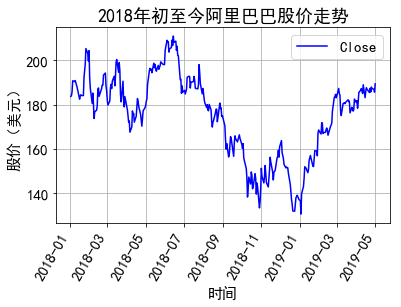

In [19]:
'''
横轴x是股票时间（babaDf.index是Pandas二维数据Dataframe的行索引，这里是时间序列）
纵轴y是收盘价Close这一列数据
plot默认是线条图
'''

ALbbDf.plot(y = "Close",color = "blue")
#x坐标轴文本
plt.xlabel('时间')
#y坐标轴文本
plt.ylabel('股价（美元）')
plt.xticks(rotation = 60)
#图片标题
plt.title('2018年初至今阿里巴巴股价走势')
#显示图例
plt.grid()

#显示图形
plt.show()


分析结果：通过图中显然可以看出阿里巴巴的股票价格总体趋势是增长的，是值得投资的一家公司。

## 散点图：成交量和股价

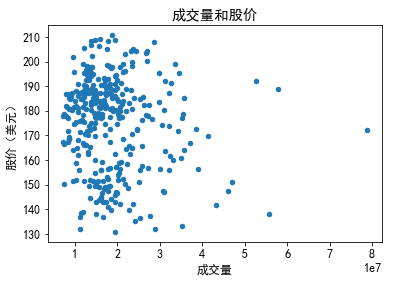

In [20]:
'''
我们给plot传入的横轴x坐标轴数据成交量这一列的数据，
纵轴y坐标轴数据是收盘价这一列的数据，
同时增加了一个参数叫kind这个值表示绘制图形的类型，这里的值等于scatter表示绘制散点图。
kind取值（图形类型）参考官方文档：http://pandas.pydata.org/pandas-docs/stable/visualization.html
'''
matplotlib.rcParams['font.size'] = 12
ALbbDf.plot(x='Volume',y='Close',kind='scatter')
#x坐标轴文本
plt.xlabel('成交量')
#y坐标轴文本
plt.ylabel('股价（美元）')

#图片标题
plt.title('成交量和股价')
#显示图形
plt.show()

In [21]:
#得到相关系数矩阵
'''
得到相关系数矩阵，不知道什么是相关系数矩阵的可以回顾这个课程：
《机器学习入门：简单线性回归》：https://www.zhihu.com/lives/934023671148949504
'''
ALbbDf.corr()

,High,Low,Open,Close,Volume,Adj Close,DayHL
High,1.000000,0.994182,0.994971,0.993745,-0.076976,0.993745,-0.076400
Low,0.994182,1.000000,0.993259,0.994785,-0.144993,0.994785,-0.183352
Open,0.994971,0.993259,1.000000,0.985715,-0.105848,0.985715,-0.113749
Close,0.993745,0.994785,0.985715,1.000000,-0.118195,1.000000,-0.139072
Volume,-0.076976,-0.144993,-0.105848,-0.118195,1.000000,-0.118195,0.639663
Adj Close,0.993745,0.994785,0.985715,1.000000,-0.118195,1.000000,-0.139072
DayHL,-0.076400,-0.183352,-0.113749,-0.139072,0.639663,-0.139072,1.000000


## GAFATA股价走势比较

<Figure size 216x720 with 0 Axes>

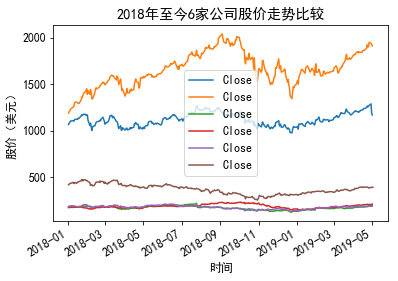

In [28]:
#绘制谷歌的画纸1
plt.figure(figsize=(3,10))

ax1=GoogleDf.plot(y='Close')

#通过指定画纸ax，在同一张画纸上绘图
#亚马逊
AmazDf.plot(ax=ax1,y='Close')
#Facebook
FBDf.plot(ax=ax1,y='Close')
#苹果
AppleDf.plot(ax=ax1,y='Close')
#阿里巴巴
ALbbDf.plot(ax=ax1,y='Close')
#腾讯
TCDf.plot(ax=ax1,y='Close')
#x坐标轴文本
plt.xlabel('时间')
#y坐标轴文本
plt.ylabel('股价（美元）')
#图片标题
plt.title('2018年至今6家公司股价走势比较')

plt.legend()
plt.show()

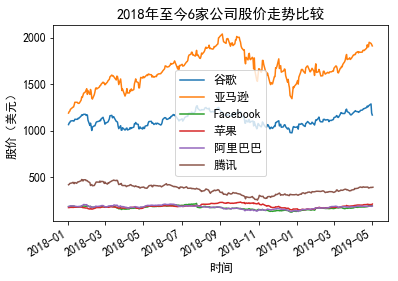

In [29]:
'''
使用label自定义图例
'''
#绘制谷歌的画纸1
ax1=GoogleDf.plot(y='Close',label='谷歌')
#通过指定画纸ax，在同一张画纸上绘图
#亚马逊
AmazDf.plot(ax=ax1,y='Close',label='亚马逊')
#Facebook
FBDf.plot(ax=ax1,y='Close',label='Facebook')
#苹果
AppleDf.plot(ax=ax1,y='Close',label='苹果')
#阿里巴巴
ALbbDf.plot(ax=ax1,y='Close',label='阿里巴巴')
#腾讯
TCDf.plot(ax=ax1,y='Close',label='腾讯')
#x坐标轴文本
plt.xlabel('时间')
#y坐标轴文本
plt.ylabel('股价（美元）')
#图片标题
plt.title('2018年至今6家公司股价走势比较')
#显示网格

plt.show()

因为谷歌和亚马逊的股价比较高，造成我们看不出其他4家公司的股票走势。
所以根据股价我们可以将这6家公司分成2组，一组是股价较高的谷歌和亚马逊。另外一组是股价较低的4家公司。

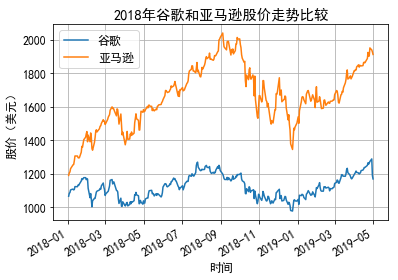

In [24]:
'''
第1组：谷歌，亚马逊
'''
#绘制谷歌的画纸2
ax2=GoogleDf.plot(y='Close',label='谷歌')
#通过指定画纸ax，在同一张画纸上绘图
#亚马逊
amazDf.plot(ax=ax2,y='Close',label='亚马逊')
#x坐标轴文本
plt.xlabel('时间')
#y坐标轴文本
plt.ylabel('股价（美元）')
#图片标题
plt.title('2018年谷歌和亚马逊股价走势比较')
#显示网格
plt.grid(True)
plt.show()

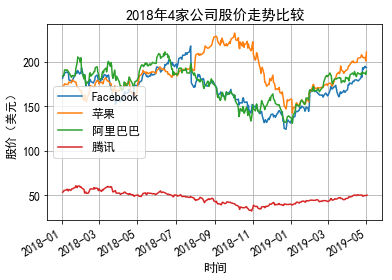

In [25]:
'''
第2组：4家公司
'''
#绘制Facebook的画纸3
#通过指定画纸ax，在同一张画纸上绘图
#Facebook
ax3=FBDf.plot(y='Close',label='Facebook')
#苹果
AppleDf.plot(ax=ax3,y='Close',label='苹果')
#阿里巴巴
ALbbDf.plot(ax=ax3,y='Close',label='阿里巴巴')
#腾讯
TCDf.plot(ax=ax3,y='Close_dollar',label='腾讯')
#x坐标轴文本
plt.xlabel('时间')
#y坐标轴文本
plt.ylabel('股价（美元）')
#图片标题
plt.title('2018年4家公司股价走势比较')
#显示网格
plt.grid(True)
plt.show()

## 柱状图：六家公司股票的平均值

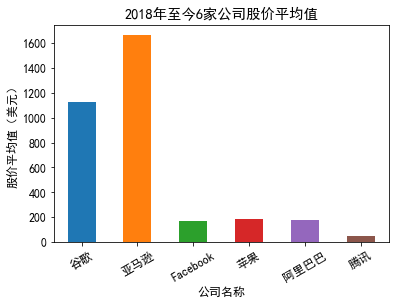

In [26]:
#6家公司股票收盘价平均值
MeanList=[GoogleDf['Close'].mean(),#谷歌
           AmazDf['Close'].mean(),#亚马逊
           FBDf['Close'].mean(),#Facebook
           AppleDf['Close'].mean(),#苹果
           ALbbDf['Close'].mean(),#阿里巴巴
           TCDf['Close_dollar'].mean()#腾讯
           ]

#创建pandas一维数组Series
MeanSer=pd.Series(MeanList,
                       index=['谷歌',
                             '亚马逊',
                            'Facebook',
                              '苹果',
                             '阿里巴巴',
                             '腾讯'])
MeanSer.plot(kind='bar',label='GAFATA')
#图片标题
plt.title('2018年至今6家公司股价平均值')
#x坐标轴文本
plt.xlabel('公司名称')
#y坐标轴文本
plt.ylabel('股价平均值（美元）')
plt.xticks(rotation = 30)
plt.show()

分析结果：可以看出，仅从股票价格上来判断，亚马逊和谷歌的股票价格要远远的超过了其他四家。但是这里只是算的平均值，下面我们看下用四分位数绘制的箱线图

## 箱线图

In [27]:
#存放6家公司的收盘价
closeDf=pd.DataFrame()
#合并6家公司的收盘价
closeDf=pd.concat([closeDf,googDf['Close'],#谷歌
                      amazDf['Close'],#亚马逊
                      fbDf['Close'],#Facebook
                      applDf['Close'],#苹果
                      babaDf['Close'],#阿里巴巴
                      txDf['Close_dollar']#腾讯 
                 ],axis=1)
#重命名列名为公司名称
closeDf.columns=['谷歌','亚马逊','Facebook','苹果','阿里巴巴','腾讯']

#箱线图
closeDf.plot(kind='box')
plt.grid(True)
plt.show()

NameError: name 'googDf' is not defined